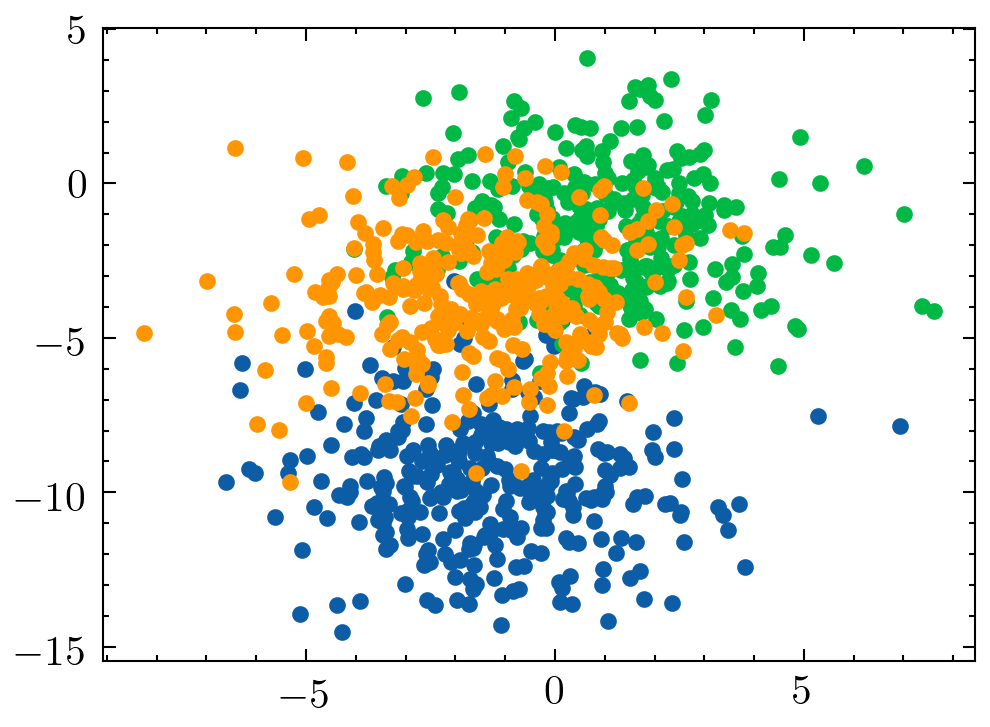

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import where
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.autolayout'] = True
plt.style.use('science')

# 生成样本
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

with plt.style.context(['science', 'scatter']):
    for class_value in range(3):
        # 找出各类别样本点的索引
        row_ix = where(y == class_value)
        # 以不同颜色绘制样本点
        plt.scatter(X[row_ix, 0], X[row_ix, 1])

    plt.show()

nodes=1: 0.148
nodes=2: 0.376
nodes=3: 0.714
nodes=4: 0.766
nodes=5: 0.890
nodes=6: 1.000
nodes=7: 0.944


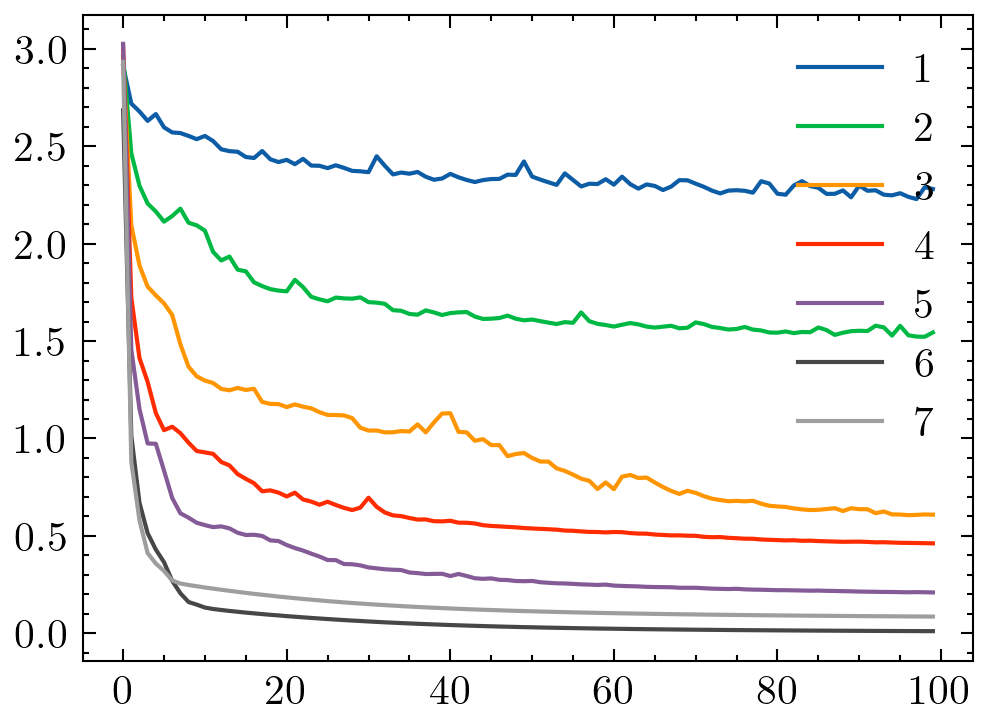

In [6]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.autolayout'] = True
plt.style.use('science')

def create_dataset():
    # 生成训练样本
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
    # one-hot编码
    y = to_categorical(y)
    # 划分 train&test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy


def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    # 添加输出和类别变量
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    # 定义模型
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # 编译模型
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # 训练模型
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    
    # 评估模型
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc

# 准备数据
trainX, trainy, testX, testy = create_dataset()

# 节点数评估列表
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
    
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    
    print('nodes=%d: %.3f' % (n_nodes, result))

    plt.plot(history.history['loss'], label=str(n_nodes))

plt.legend()
plt.show()

layers=1: 1.000
layers=2: 1.000
layers=3: 0.936
layers=4: 0.948
layers=5: 0.732


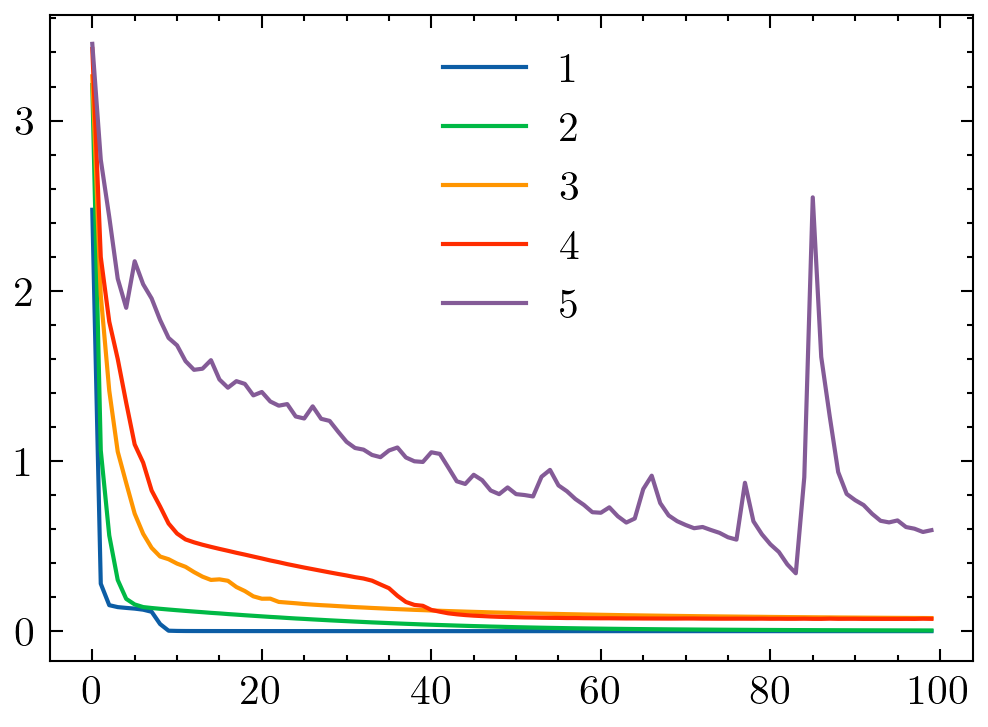

In [7]:
# study of mlp learning curves given different number of layers for multi-class classification
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.autolayout'] = True
plt.style.use('science')

def create_dataset():
    # 生成训练样本
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
    # one-hot编码
    y = to_categorical(y)
    # 划分 train&test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

def evaluate_model(n_layers, trainX, trainy, testX, testy):
    # 添加输出和类别变量
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    # 定义模型
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # 编译模型
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # 训练模型
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    
    # 评估模型
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc


trainX, trainy, testX, testy = create_dataset()
all_history = []

# 设置评估的层数
num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    
    print('layers=%d: %.3f' % (n_layers, result))

    plt.plot(history.history['loss'], label=str(n_layers))
    
plt.legend()
plt.show()